In [4]:
import pandas as pd
data = pd.read_csv(r"C:\Users\nikhi\Downloads\archive (3)\bmi.csv")



In [5]:
data.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1}) #ConvertS Gender to a numeric format using label encoding


In [8]:
data.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Height', 'Weight']] = scaler.fit_transform(data[['Height', 'Weight']])


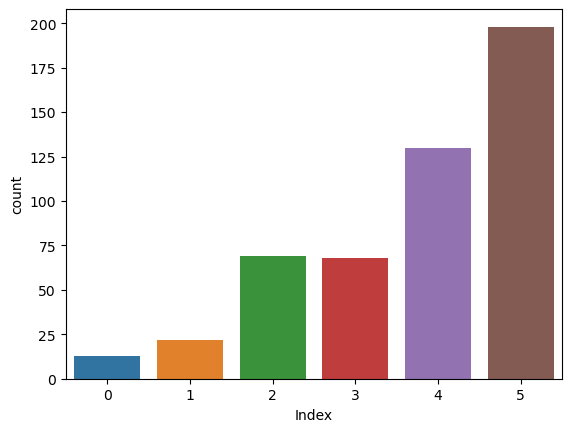

<Axes: xlabel='Index', ylabel='Weight'>

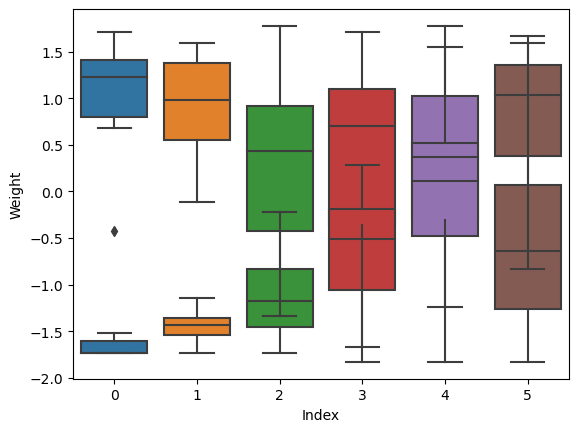

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of BMI Categories
sns.countplot(x='Index', data=data)
plt.show()

# Boxplot of Height and Weight by BMI Index
sns.boxplot(x='Index', y='Height', data=data)
sns.boxplot(x='Index', y='Weight', data=data)


In [11]:
correlation = data.corr()
print(correlation)


          Gender    Height    Weight     Index
Gender  1.000000  0.017677 -0.009523 -0.028786
Height  0.017677  1.000000  0.000446 -0.422223
Weight -0.009523  0.000446  1.000000  0.804569
Index  -0.028786 -0.422223  0.804569  1.000000


In [12]:
X = data[['Gender', 'Height', 'Weight']]
y = data['Index']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4
           2       0.89      0.89      0.89        18
           3       0.78      0.88      0.82         8
           4       0.93      0.93      0.93        30
           5       0.95      0.95      0.95        39

    accuracy                           0.91       100
   macro avg       0.72      0.73      0.72       100
weighted avg       0.90      0.91      0.91       100



C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

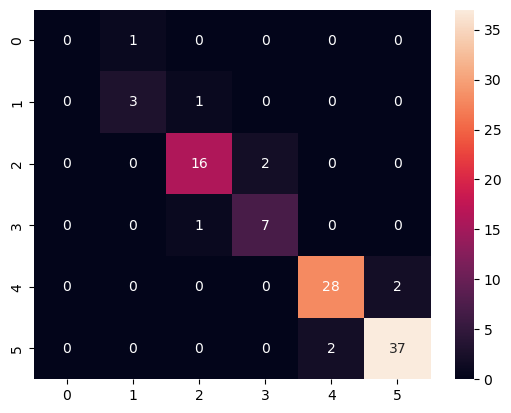

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a Logistic Regression model
model = LogisticRegression()

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV with the logistic regression model and parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 10, 'max_iter': 100}
